## Advertising Sales Channel Prediction
By Aliakbar Mohsin

#### Problem Statement:
Sales Channel Prediction Case Study  

When a company enters a market, the distribution strategy and channel it uses are keys to its success in the market, as well as market know-how and customer knowledge and understanding. Because an effective distribution strategy under efficient supply-chain management opens doors for attaining competitive advantage and strong brand equity in the market, it is a component of the marketing mix that cannot be ignored . 

The distribution strategy and the channel design have to be right the first time. The case study of Sales channel includes the detailed study of TV, radio and newspaper channel. The predict the total sales generated from all the sales channel.  

In [114]:
#importing the required libraries
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [115]:
df = pd.read_csv("Advertising.csv")
df

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [116]:
#drpping the first Unnamed column as it is just indexing column in my dataset.
df = df.drop(['Unnamed: 0'],axis=1)

In [117]:
df.shape

(200, 4)

In [118]:
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [119]:
#Checking for any empty observation in target column
df.loc[df['sales'] == " "]

,TV,radio,newspaper,sales


In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [121]:
df.nunique()

TV           190
radio        167
newspaper    172
sales        121
dtype: int64

In [122]:
#Checking unique values in target column
df['sales'].unique()

array([22.1, 10.4,  9.3, 18.5, 12.9,  7.2, 11.8, 13.2,  4.8, 10.6,  8.6,
       17.4,  9.2,  9.7, 19. , 22.4, 12.5, 24.4, 11.3, 14.6, 18. ,  5.6,
       15.5, 12. , 15. , 15.9, 18.9, 10.5, 21.4, 11.9,  9.6,  9.5, 12.8,
       25.4, 14.7, 10.1, 21.5, 16.6, 17.1, 20.7,  8.5, 14.9, 23.2, 14.8,
       11.4, 10.7, 22.6, 21.2, 20.2, 23.7,  5.5, 23.8, 18.4,  8.1, 24.2,
       15.7, 14. , 13.4, 22.3, 18.3, 12.4,  8.8, 11. , 17. ,  8.7,  6.9,
       14.2,  5.3, 12.3, 13.6, 21.7, 15.2, 16. , 16.7, 11.2,  7.3, 19.4,
       22.2, 11.5, 16.9, 11.7, 17.2, 19.2, 19.8, 21.8, 14.1, 12.6, 12.2,
        9.4,  6.6,  7. , 11.6, 19.7, 24.7,  1.6, 12.7,  5.7, 19.6, 10.8,
       20.8, 10.9, 20.1, 10.3, 16.1, 15.6,  3.2, 15.3, 14.4, 13.3,  8. ,
        8.4, 14.5,  7.6, 27. , 26.2, 17.6, 17.3,  6.7,  9.9,  5.9, 25.5])

In [123]:
#Checking for value count of target column
df['sales'].value_counts()

9.7     5
12.9    4
11.7    4
15.9    4
25.4    3
       ..
15.7    1
14.2    1
11.2    1
19.4    1
18.5    1
Name: sales, Length: 121, dtype: int64

In [124]:
#describing the data set
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


## Univariate Analysis

<AxesSubplot:xlabel='TV', ylabel='Density'>

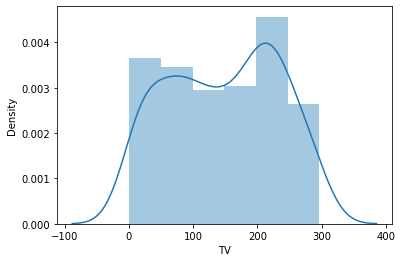

In [125]:
#distplot for TV
sn.distplot(df['TV'])

TV column looks almost normally distributed

<AxesSubplot:xlabel='radio', ylabel='Density'>

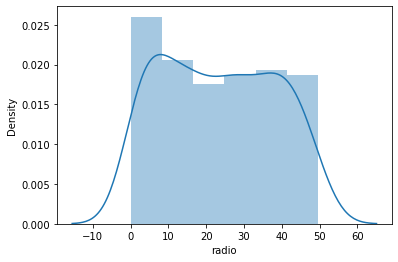

In [126]:
#distplot for radio
sn.distplot(df['radio'])

radio column also looks normal

<AxesSubplot:xlabel='newspaper', ylabel='Density'>

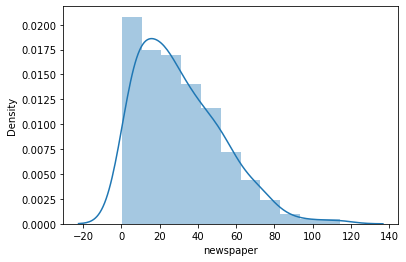

In [128]:
#distplot for newspaper
sn.distplot(df['newspaper'])

newspaper column looks a bit skewed

<AxesSubplot:xlabel='sales', ylabel='Density'>

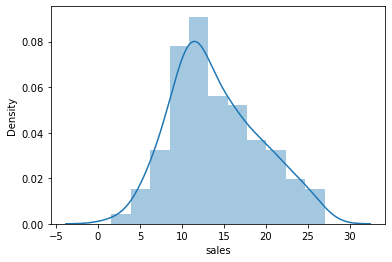

In [129]:
#distplot for sales
sn.distplot(df['sales'])

sales column looks almost normally distributed

### Bivariate Analysis

<AxesSubplot:title={'center':'Comparision between TV and Radio'}, xlabel='TV', ylabel='radio'>

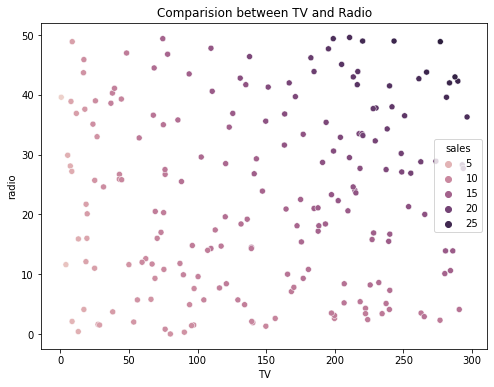

In [130]:
#Comparing all the feature columns

#Comparision between TV and Radio
plt.figure(figsize=(8,6))
plt.title("Comparision between TV and Radio")
sn.scatterplot(x=df['TV'], y=df['radio'],hue=df['sales'])

 radio and TV has scattered format with sales

<AxesSubplot:title={'center':'Comparision between TV and newspaper'}, xlabel='TV', ylabel='newspaper'>

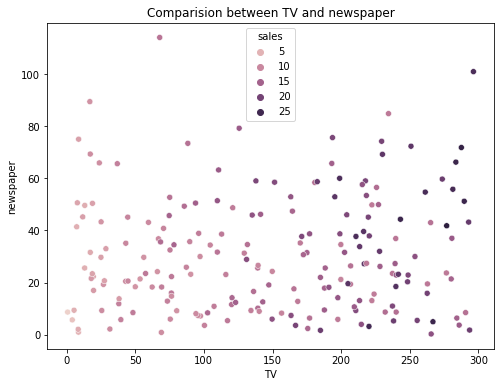

In [131]:
#Comparision between TV and newspaper
plt.figure(figsize=(8,6))
plt.title("Comparision between TV and newspaper")
sn.scatterplot(x=df['TV'], y=df['newspaper'],hue=df['sales'])

 TV and newspaper has ascnding format with sales

<AxesSubplot:title={'center':'Comparision between radio and newspaper'}, xlabel='radio', ylabel='newspaper'>

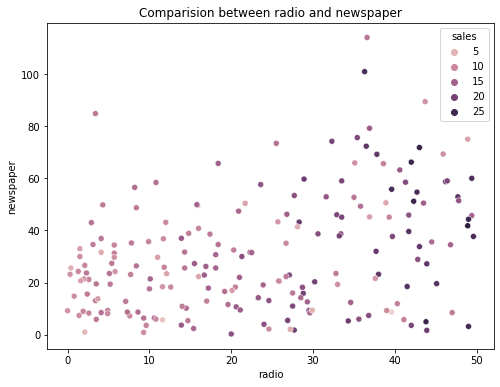

In [132]:
#Comparision between radio and newspaper
plt.figure(figsize=(8,6))
plt.title("Comparision between radio and newspaper")
sn.scatterplot(x=df['radio'], y=df['newspaper'],hue=df['sales'])

 radio and newspaper has scattered format with sales

## Multi-variate Analysis

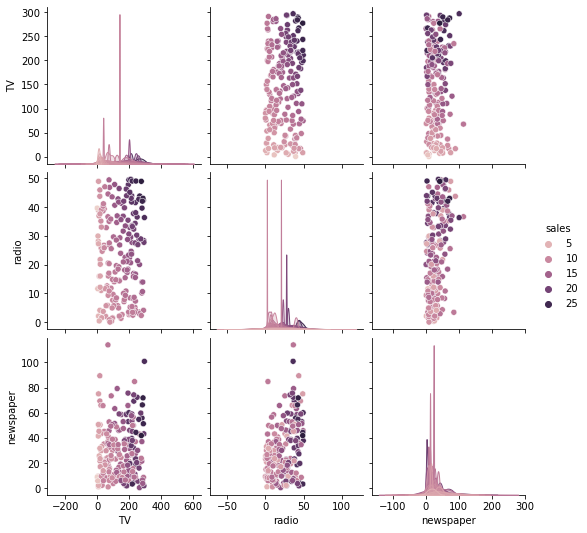

In [133]:
#Plotting a pair plot with all the feature columns
sn.pairplot(df, hue='sales')

I can obderve from the pairplot that my sale value increases with increase in feature values.

## Identifying the outliers

<AxesSubplot:>

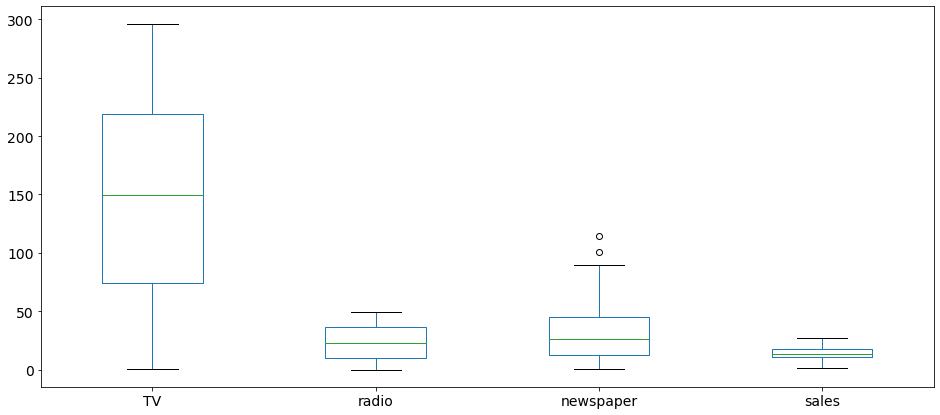

In [134]:
df.plot(kind='box',fontsize=14,figsize=(16,7))

I can see 2 outliers in Newspaper column. I can also see skewness in newspaper which we will treat later.

## Data cleaning

### Removing outliers

In [135]:
#Making a variable as dfContCols and listing all columns with outliers.
dfContCols = df[["newspaper"]]

In [136]:
#Using zscore to remove the outliers
from scipy.stats import zscore
ZS = np.abs(zscore(dfContCols))
df1 = df[(ZS<3).all(axis=1)]
df1.shape

(198, 4)

In [137]:
df.shape

(200, 4)

I've succefully removed the outliers using zscore 
Rows in my new dataset are 198 whereas previously we had 200 rows.

In [138]:
#Checking the data loss
((200-198)/200)*100

1.0

So I get data loss of just 1% hence I'll proceed with zscore.

### Checking skewness

In [139]:
df1.skew()

TV          -0.082332
radio        0.114842
newspaper    0.650112
sales        0.407130
dtype: float64

I see skewness only in newspaper column.

### Removing skewness using yeo-johnson method

In [140]:
#Creating list of column with skewness
cols=['newspaper']

#Removing skewness using yeo-johnson
from sklearn.preprocessing import PowerTransformer
PT = PowerTransformer(method='yeo-johnson')

In [141]:
df1[cols] = PT.fit_transform(df1[cols].values)
df1.skew()

TV          -0.082332
radio        0.114842
newspaper   -0.101288
sales        0.407130
dtype: float64

The skewness has been complately removed by using yeo-johnson method

<AxesSubplot:xlabel='newspaper', ylabel='Density'>

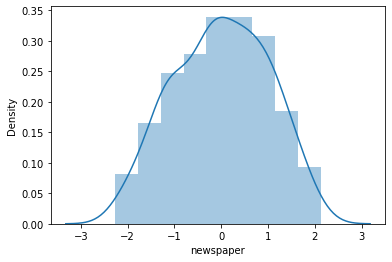

In [142]:
sn.distplot(df1['newspaper'])

newspaper now looks normally distributed.

<AxesSubplot:>

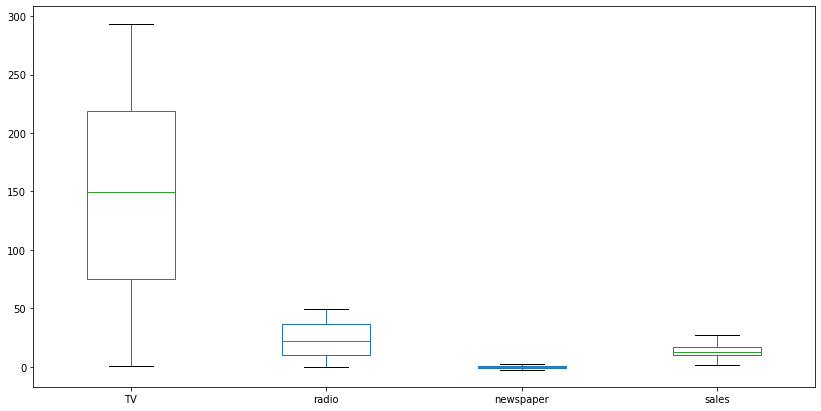

In [143]:
df1.plot(kind='box', figsize=(14,7))

By this plot, I can confirm that outliers and skewness are completely removed.

### Correlation matrix with heat map

In [144]:
cor = df1.corr()
cor

,TV,radio,newspaper,sales
TV,1.000000,0.051978,0.038288,0.779121
radio,0.051978,1.000000,0.296570,0.576748
newspaper,0.038288,0.296570,1.000000,0.191387
sales,0.779121,0.576748,0.191387,1.000000


got all correlations of features with other features. Let me visualize it using heat map

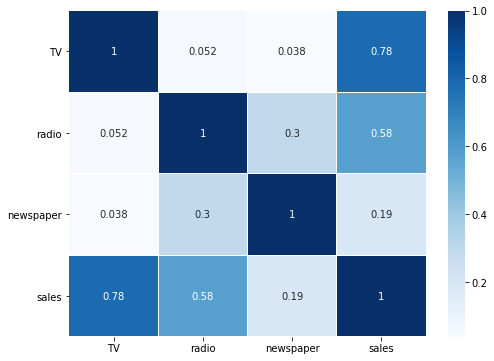

In [145]:
plt.figure(figsize=(8,6))
sn.heatmap(cor,linewidths=.1,cmap="Blues",annot=True, annot_kws={"size": 10})
plt.yticks(rotation=0);

By looking at the heatmap, I can say that:
1. TV is most related with sales. Whereas newspaper is least related with our target.
2. TV and newspaper are less correlated.
3. TV and radio are less correlated.

#### Visualizing correlation of target variable using bar plot

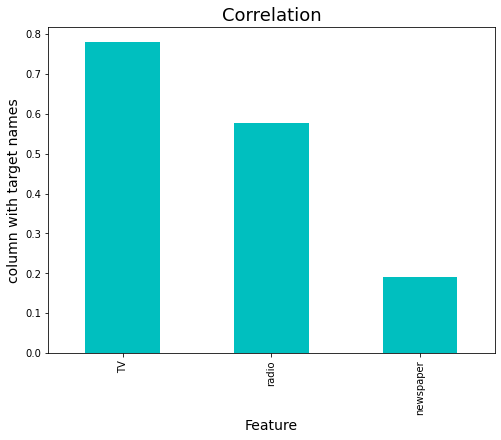

In [146]:
plt.figure(figsize=(8,6))
df1.corr()['sales'].sort_values(ascending=False).drop(['sales']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('Correlation',fontsize=18)
plt.show()

We can confirm that newspaper is less correlated comparitively with target variable.

## Preprocessing

In [147]:
x = df1.drop("sales",axis=1)
y = df1["sales"]

### SCALING

In [148]:
#importing necessary libraries
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score           #using r2_score as this is cont. data
from sklearn.model_selection import train_test_split

In [149]:
mms=MinMaxScaler()
x = pd.DataFrame(mms.fit_transform(x), columns=x.columns)
x

,TV,radio,newspaper
0,0.783202,0.762097,0.878788
1,0.149539,0.792339,0.703678
2,0.056333,0.925403,0.879435
3,0.514851,0.832661,0.806215
4,0.614886,0.217742,0.805502
...,...,...,...
193,0.128030,0.074597,0.359758
194,0.319222,0.098790,0.255878
195,0.601912,0.187500,0.217749
196,0.965859,0.846774,0.859129


I've succesfully scaled the dataset using minmaxscaler

### FIND BEST random_state 

In [150]:
from sklearn.linear_model import LinearRegression
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =i)
    mod = LinearRegression()
    mod.fit(x_train, y_train)
    pred = mod.predict(x_test)
    acc=r2_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.9358346827439895  on Random_state  90


Got best accuracy and random state.

In [151]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=.30, random_state=maxRS)

I've created the train and test data where test data is 30% of my total data.

## FINDING BEST ALGORITHM

In [152]:
#importing necessary libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

#### Linear Regression

In [153]:
lr=LinearRegression()
lr.fit(x_train,y_train)
pred=lr.predict(x_test)
print('R2_score:',r2_score(y_test,pred))

R2_score: 0.9358346827439895


#### DecisionTreeRegressor

In [154]:
DTR=DecisionTreeRegressor()
DTR.fit(x_train,y_train)
pred=DTR.predict(x_test)
print('R2_score:',r2_score(y_test,pred))

R2_score: 0.9630285909521937


#### RandomForestRegressor

In [155]:
RFR=RandomForestRegressor()
RFR.fit(x_train,y_train)
pred=RFR.predict(x_test)
print('R2_score:',r2_score(y_test,pred))

R2_score: 0.9675655413739924


#### SupportVectorRegressor

In [156]:
svr=SVR()
svr.fit(x_train,y_train)
pred=svr.predict(x_test)
print('R2_score:',r2_score(y_test,pred))

R2_score: 0.9388708730222921


#### K-Neighbor Regressor

In [157]:
knnr=KNN()
knnr.fit(x_train,y_train)
pred=knnr.predict(x_test)
print('R2_score:',r2_score(y_test,pred))

R2_score: 0.9418441969804539


#### Stochastic Gradient Descent Regressor

In [158]:
SGD=SGDRegressor()
SGD.fit(x_train,y_train)
pred=SGD.predict(x_test)
print('R2_score:',r2_score(y_test,pred))

R2_score: 0.9220771664540027


So accuracy scores for all the models are as follow:

1. Linear Regression                      - 94
2. DecisionTreeRegressor                  - 96
3. RandomForestRegressor                  - 97
4. SupportVectorRegressor                 - 94
5. K-Neighbor Regressor                   - 94
6. Stochastic Gradient Descent Regressor  - 92

## Cross Validation

In [159]:
#importing cross val library
from sklearn.model_selection import cross_val_score

In [160]:
print(cross_val_score(lr,x,y,cv=5).mean())

0.8857739370001966


In [161]:
print(cross_val_score(DTR,x,y,cv=5).mean())

0.9569519767257274


In [162]:
print(cross_val_score(RFR,x,y,cv=5).mean())

0.9761610472973576


In [163]:
print(cross_val_score(svr,x,y,cv=5).mean())

0.91278463451271


In [164]:
print(cross_val_score(knnr,x,y,cv=5).mean())

0.9407052322824345


In [165]:
print(cross_val_score(SGD,x,y,cv=5).mean())

0.8829557653004327


I got the cross validation scores of all the algorithms
Now, let me check the difference so that I can decide the best model.

Difference between r2_score & cross_val_score
1. Linear Regression                      - 94-89= 5
2. DecisionTreeRegressor                  - 96-95= 1
3. RandomForestRegressor                  - 97-98= 1
4. SupportVectorRegressor                 - 94-91= 3
5. K-Neighbor Regressor                   - 94-94= 0
6. Stochastic Gradient Descent Regressor  - 92-88= 4

I can see that KNN has the least difference.
By looking into the difference of accuracy of the model and its cross validation score, I can conclude that K-Neighbor Regressor is the best model.

## HYPERPARAMETER TUNING

In [166]:
#importing necessary libraries
from sklearn.model_selection import GridSearchCV

In [167]:
#Creating a dictionary of parameters for KNN
parameter = {'n_neighbors':[1,2,3,4,5,6],
             'weights':['uniform','distance'],
             'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
             'n_jobs':[1,2,3,4,5]}

In [168]:
#Create a GridSearchCV object and fit it to the training data
GCV=GridSearchCV(KNN(),parameter,cv=5)
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_jobs': [1, 2, 3, 4, 5],
                         'n_neighbors': [1, 2, 3, 4, 5, 6],
                         'weights': ['uniform', 'distance']})

In [169]:
#Finding the optimal parameters
GCV.best_params_

{'algorithm': 'auto', 'n_jobs': 1, 'n_neighbors': 4, 'weights': 'distance'}

Got the best parameters for my final model.

In [170]:
Final_mod=KNN(algorithm='auto',n_jobs=1,n_neighbors=4,weights='distance')
Final_mod.fit(x_train,y_train)
pred=Final_mod.predict(x_test)
acc=r2_score(y_test, pred)

print(acc*100)

94.3463529971545


### After tuning, the accuracy increased to 94.35%

## SERIALIZATON (Saving model)

In [171]:
#Saving the model as .pkl file
import joblib
joblib.dump(Final_mod,"Advertising.pkl")

['Advertising.pkl']